In [1]:
import pandas as pd
import sqlite3
import taxis
import matplotlib.pyplot as plt

In [2]:
DBNAME="taxis.db"
LAT=1.380766
LON=103.891675

In [27]:
data=taxis.fetch_grid_by_date(DBNAME,"20170627")

In [30]:
df = pd.DataFrame(data)
df.columns=['time','x','y','taxicount']

In [31]:
df.head()


,time,x,y,taxicount
0,0000,0,0,0
1,0000,1,0,0
2,0000,2,0,0
3,0000,3,0,0
4,0000,4,0,0


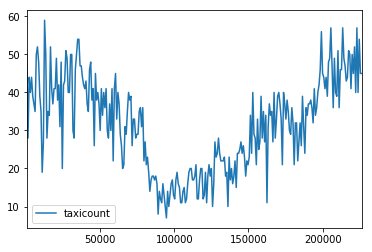

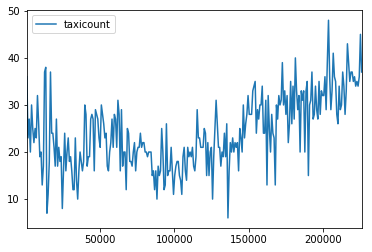

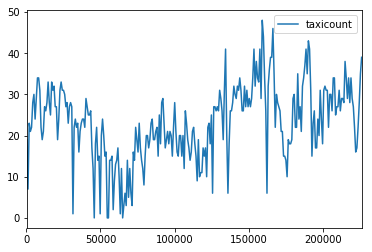

In [52]:
df.query('x==24 and y==12').plot(y='taxicount')
df.query('x==24 and y==10').plot(y='taxicount')
df.query('x==24 and y==8').plot(y='taxicount')
plt.show()
